In [88]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('./assets/survey_results_public.csv')
schema = pd.read_csv('./assets/survey_results_schema.csv')

In [15]:
pd.options.display.max_rows = 2000
pd.options.display.max_colwidth = 1000
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
df.shape

(64461, 61)

In [12]:
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,Age,"What is your age (in years)? If you prefer not to answer, you may leave this question blank."
4,Age1stCode,"At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)"
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,"What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty."
7,ConvertedComp,"Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks."
8,Country,Where do you live?
9,CurrencyDesc,"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in."


In [4]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or software engineering",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no longer am",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or software engineering",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [16]:
# Exclude CompTotal as it is pre converted and normalised to annual USD , which is stored in ConvertedComp
df.drop(columns=['CompTotal']).describe()

,Respondent,Age,ConvertedComp,WorkWeekHrs
count,"64,461.00","45,446.00","34,756.00","41,151.00"
mean,"32,554.08",30.83,"103,756.05",40.78
std,"18,967.44",9.59,"226,885.30",17.82
min,1.00,1.00,0.00,1.00
25%,"16,116.00",24.00,"24,648.00",40.00
50%,"32,231.00",29.00,"54,049.00",40.00
75%,"49,142.00",35.00,"95,000.00",44.00
max,"65,639.00",279.00,"2,000,000.00",475.00


In [20]:
(df.isna().sum() / df.shape[0]).sort_values()

Respondent                                     0.00
Hobbyist                                       0.00
MainBranch                                     0.00
Country                                        0.01
Employment                                     0.01
NEWSOSites                                     0.10
Age1stCode                                     0.10
YearsCode                                      0.11
EdLevel                                        0.11
LanguageWorkedWith                             0.11
NEWOtherComms                                  0.11
SOVisitFreq                                    0.12
SOAccount                                      0.12
SOComm                                         0.12
OpSys                                          0.13
NEWLearn                                       0.13
NEWStuck                                       0.15
NEWPurpleLink                                  0.15
LanguageDesireNextYear                         0.16
PlatformWork

In [29]:
df['Country'].value_counts().head(10)

United States     12469
India              8403
United Kingdom     3896
Germany            3890
Canada             2191
France             1898
Brazil             1818
Netherlands        1343
Poland             1278
Australia          1208
Name: Country, dtype: int64

In [58]:
df['Country'].value_counts().loc[['United States', 'Canada', 'Australia', 'United Kingdom', 'New Zealand']]

United States     12469
Canada             2191
Australia          1208
United Kingdom     3896
New Zealand         353
Name: Country, dtype: int64

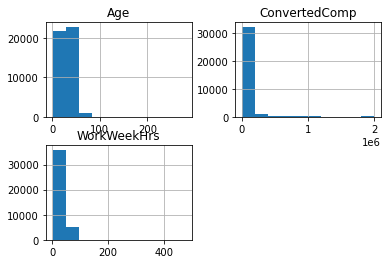

In [36]:
df.drop(columns=['Respondent', 'CompTotal']).hist();

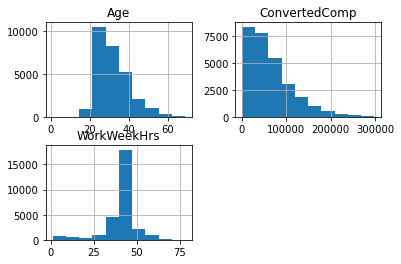

In [57]:
df \
  .query('Age < 70 and ConvertedComp < 300000 and WorkWeekHrs < 80') \
  .drop(columns=['Respondent', 'CompTotal']) \
  .hist();

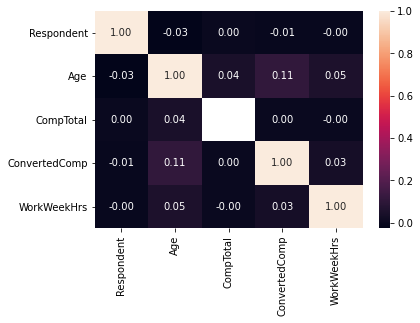

In [89]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");